In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
np.random.seed(2)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train=pd.read_csv('train_upd.csv')
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [3]:
normal_cols= ['par_day', 'par_hour', 'par_min', 'subscriber_count', 'beam_direction', 'cell_range','tilt', 'ran_vendor']

In [4]:
train['Congestion_Type'].unique()

array(['4G_BACKHAUL_CONGESTION', 'NC', '3G_BACKHAUL_CONGESTION',
       '4G_RAN_CONGESTION'], dtype=object)

In [5]:
train['ran_vendor'].unique()

array(['ERICSSON', 'NOKIA', 'HUAWEI'], dtype=object)

In [6]:
lb1=LabelEncoder()
train['ran_vendor']=lb1.fit_transform(train['ran_vendor'])

In [7]:
lb1.classes_

array(['ERICSSON', 'HUAWEI', 'NOKIA'], dtype=object)

In [8]:
lb2=LabelEncoder()
train['Congestion_Type']=lb2.fit_transform(train['Congestion_Type'])

In [9]:
lb2.classes_

array(['3G_BACKHAUL_CONGESTION', '4G_BACKHAUL_CONGESTION',
       '4G_RAN_CONGESTION', 'NC'], dtype=object)

In [10]:
Y=train['Congestion_Type'].values

In [11]:
X=train.drop(['Congestion_Type','cell_name'],axis=1).values

In [12]:
X_scaled= scale(X)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [13]:
X_train,X_val,Y_train, Y_val=train_test_split(X_scaled,Y,test_size=0.3)

In [14]:
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [15]:
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,0,1
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,2,3
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,0,0
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,1,0
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,1,2


In [16]:
RFC=RandomForestClassifier(n_estimators=300)
RFC.fit(X_train,Y_train)
pred=RFC.predict(X_val)
matthews_corrcoef(pred,Y_val)

0.6706139996806

In [17]:
mlp= MLPClassifier()
mlp.fit(X_train, Y_train)
pred_mlp= mlp.predict(X_val)
matthews_corrcoef(pred_mlp, Y_val)

0.7030374957847906

In [18]:
ada= AdaBoostClassifier()
ada.fit(X_train, Y_train)
pred_ada= ada.predict(X_val)
matthews_corrcoef(pred_ada, Y_val)

0.6349153663007429

In [19]:
lr= LogisticRegression()
lr.fit(X_train, Y_train)
pred_lr= lr.predict(X_val)
matthews_corrcoef(pred_lr, Y_val)

0.7033902588584556

In [20]:
from xgboost import XGBClassifier
XG = XGBClassifier(n_estimators=500)
XG.fit(X_train, Y_train)
yn_pred = XG.predict(X_val)

from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(Y_val, yn_pred)
#train_scores, valid_scores=validation_curve(XG, Xn, yn, "n-estimators", [50,100,200,400,500])

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7291565385520883

In [21]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier,RandomTreesEmbedding,IsolationForest,VotingClassifier
from sklearn.linear_model import LogisticRegression


GRA=GradientBoostingClassifier(n_estimators=500)
GRA.fit(X_train,Y_train)
pred_GRA=GRA.predict(X_val)
print(matthews_corrcoef(Y_val,pred_GRA))

0.7235311203790586


# feature engineering

# x ==> log(1+x)

In [22]:
train=pd.read_csv('train_upd.csv')
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [23]:
cols=[ 'subscriber_count', 'web_browsing_total_bytes',
       'video_total_bytes', 'social_ntwrking_bytes',
       'cloud_computing_total_bytes', 'web_security_total_bytes',
       'gaming_total_bytes', 'health_total_bytes', 'communication_total_bytes',
       'file_sharing_total_bytes', 'remote_access_total_bytes',
       'photo_sharing_total_bytes', 'software_dwnld_total_bytes',
       'marketplace_total_bytes', 'storage_services_total_bytes',
       'audio_total_bytes', 'location_services_total_bytes',
       'presence_total_bytes', 'advertisement_total_bytes',
       'system_total_bytes', 'voip_total_bytes', 'speedtest_total_bytes',
       'email_total_bytes', 'weather_total_bytes', 'media_total_bytes',
       'mms_total_bytes', 'others_total_bytes']
for each in cols:
    train[each]=np.log(train[each]+1)

In [24]:
lb1=LabelEncoder()
train['ran_vendor']=lb1.fit_transform(train['ran_vendor'])
lb2=LabelEncoder()
train['Congestion_Type']=lb2.fit_transform(train['Congestion_Type'])
X_scaled1=train.drop(['cell_name', 'Congestion_Type', 'par_year', 'par_month'], axis=1)
X_scaled1=(X_scaled1-X_scaled1.mean())/X_scaled1.std()
Y1=train['Congestion_Type'].values
X_train1,X_val1,Y_train1, Y_val1=train_test_split(X_scaled1,Y1,test_size=0.3)

In [25]:
mlp= MLPClassifier()
mlp.fit(X_train1, Y_train1)
pred_mlp1= mlp.predict(X_val1)
matthews_corrcoef(pred_mlp1, Y_val1)

0.6851312851454872

In [26]:
lr= LogisticRegression()
lr.fit(X_train1, Y_train1)
pred_lr1= lr.predict(X_val1)
matthews_corrcoef(pred_lr1, Y_val1)

0.674989684188821

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(Y_val, y_pred))

0.4082578473699544


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
ETF = ExtraTreesClassifier()
ETF.fit(X_train, Y_train)
y_pred = ETF.predict(X_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(Y_val, y_pred))

0.5608845867760748


# span of the day and day of the week and one hot encoding

In [29]:
train=pd.read_csv('train_upd.csv')
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [30]:
val = []
for item in train['par_hour'] :
    value=0
    if(item<7 and item>=1):
        value = 0
    elif (item<11 and item>=7) :
        value = 1
    elif (item<16 and item>=11) :
        value = 2
    elif (item<20 and item>=16) :
        value = 3
    elif (item>=20) :
        value = 4
    val.append(value)

In [31]:
day_of_week= []
for item in train['par_day']:
    day_of_week.append(item%7)

In [32]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train['ran_vendor'].values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [33]:
train['span_of_day']= val
train['day_of_week']= day_of_week
train['ERICSSON']= onehot_encoded[:, 0]
train['HUAWEI']= onehot_encoded[:, 1]
train['NOKIA']= onehot_encoded[:, 2]

In [34]:
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type,span_of_day,day_of_week,ERICSSON,HUAWEI,NOKIA
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION,0,1,1.0,0.0,0.0
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,93,7,5,NOKIA,NC,4,0,0.0,0.0,1.0
2,3607540856,1,2018,12,5,16,35,277,887,945,...,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION,3,5,1.0,0.0,0.0
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION,4,2,0.0,1.0,0.0
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,112,3,5,HUAWEI,4G_RAN_CONGESTION,0,4,0.0,1.0,0.0


In [35]:
lb1=LabelEncoder()
train['ran_vendor']=lb1.fit_transform(train['ran_vendor'])
lb2=LabelEncoder()
train['Congestion_Type']=lb2.fit_transform(train['Congestion_Type'])
X_scaled1=train.drop(['cell_name', 'Congestion_Type', 'par_year', 'par_month'], axis=1)
X_scaled1=(X_scaled1-X_scaled1.mean())/X_scaled1.std()
Y1=train['Congestion_Type'].values
X_train1,X_val1,Y_train1, Y_val1=train_test_split(X_scaled1,Y1,test_size=0.3)

In [36]:
mlp= MLPClassifier()
mlp.fit(X_train1, Y_train1)
pred_mlp1= mlp.predict(X_val1)
matthews_corrcoef(pred_mlp1, Y_val1)

0.7040500761994477

In [37]:
lr= LogisticRegression()
lr.fit(X_train1, Y_train1)
pred_lr1= lr.predict(X_val1)
matthews_corrcoef(pred_lr1, Y_val1)

0.7002342235308595

# final model

In [38]:
train=pd.read_csv('train_upd.csv')
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [63]:
lb1=LabelEncoder()
train['ran_vendor']=lb1.fit_transform(train['ran_vendor'])
lb2=LabelEncoder()
train['Congestion_Type']=lb2.fit_transform(train['Congestion_Type'])
X_scaled1=train.drop(['cell_name', 'Congestion_Type', 'par_year', 'par_month', 'par_min', '4G_rat'], axis=1)
X_scaled1=(X_scaled1-X_scaled1.mean())/X_scaled1.std()
Y1=train['Congestion_Type'].values
X_train,X_val,Y_train, Y_val=train_test_split(X_scaled1,Y1,test_size=0.25)

In [40]:
GRA=GradientBoostingClassifier(n_estimators=500)
GRA.fit(X_train,Y_train)
pred_GRA=GRA.predict(X_val)
print(matthews_corrcoef(Y_val,pred_GRA))

0.7201299834542767


In [64]:
LR=LogisticRegression(C=1,penalty='l1',tol=0.0001,max_iter=300)
LR.fit(X_train,Y_train)
pred_LR=LR.predict(X_val)
print(matthews_corrcoef(Y_val,pred_LR))

0.7013829728983039


In [65]:
mlp= MLPClassifier(alpha=1,max_iter=300)
mlp.fit(X_train, Y_train)
pred_mlp= mlp.predict(X_val)
matthews_corrcoef(pred_mlp, Y_val)

0.716075414685844

In [66]:
XG = XGBClassifier(n_estimators=500)
XG.fit(X_train, Y_train)
pred_XG = XG.predict(X_val)
matthews_corrcoef(pred_XG, Y_val)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7285889957674749

In [67]:
votingC=VotingClassifier([('GRA',GRA),('MLP',mlp),('LR',LR),('XG',XG)],voting='soft')
votingC.fit(X_train,Y_train)
pred=votingC.predict(X_val)
print(matthews_corrcoef(Y_val,pred))
confusion_matrix(Y_val,pred)

0.7341174462665222


C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[3885,  404,    0,  612],
       [ 723, 3320,  857,    1],
       [  24,  867, 3958,    0],
       [ 431,    0,    0, 4558]], dtype=int64)

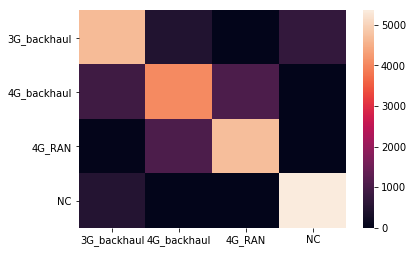

In [62]:
sns.heatmap(confusion_matrix(Y_val,pred), xticklabels=['3G_backhaul', '4G_backhaul', '4G_RAN','NC'], yticklabels=['3G_backhaul', '4G_backhaul', '4G_RAN','NC'])

In [46]:
test=pd.read_csv('test.csv')
test.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor
0,160261,0,2018,12,16,22,55,101,1140,2799,...,18,18,16,167,103,20,62,5,4,NOKIA
1,453651,0,2018,12,23,9,20,44,7505,473,...,17,11,57,51,25,493,69,2,4,NOKIA
2,508631,1,2018,12,24,9,30,2037,66,11327,...,20,21,267,30,242,39,61,2,3,ERICSSON
3,662615,0,2018,12,28,0,35,25,970,4246,...,10,10,6,12,11,26,70,3,3,ERICSSON
4,735573,0,2018,12,14,0,40,1494,1101,2948,...,133,3,87,69,290,38,61,7,2,NOKIA


In [47]:
test.shape

(26305, 38)

In [48]:
lb1=LabelEncoder()
test['ran_vendor']=lb1.fit_transform(test['ran_vendor'])
X_scaled1=test.drop(['cell_name', 'par_year', 'par_month', 'par_min', '4G_rat'], axis=1)
X_scaled1=(X_scaled1-X_scaled1.mean())/X_scaled1.std()

In [49]:
y_pred=votingC.predict(X_scaled1)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
y_pred=lb2.inverse_transform(y_pred)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
y_pred.shape

(26305,)

In [52]:
submission = pd.DataFrame({
        "cell_name": test["cell_name"],
        "Survived": y_pred
    })

In [53]:
submission.to_csv('prediction.csv',index=False)